In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pipe_replacement = pd.read_csv("raw-data/SW - Lead Comm Pipe Replacements (2004-2018).csv")
valid_cols = [col for col in pipe_replacement.columns if col[0:7] != "Unnamed"]
pipe_replacement = pipe_replacement[valid_cols]
pipe_replacement.head()



,Work Order Id,Std Job No,WO Completed Status,WO Create Date,Ads Building Number,Ads Eastings,Ads Northings,Ads Operation Area,Ads Osapr,Street postcode,Ads Post Town,Ads Region,Ads Water Operational Area,Ads Water Supply Zone
0,17598,WRNW17,All Complete ...,08/04/2004,13,"211,416.00","774,804.00",North West,APHTGJ8X5X1540903G,PH336NS,FORT WILLIAM,North,Camisky Wellfield WOA,Cowhill WSZ
1,17613,WRNW17,All Complete with Comments ...,08/04/2004,NaN,"345,995.00","644,362.00",South East,APJ14X8J5HJ5M5A0MT,TD12QT,GALASHIELS,South,Manse Street Galashiels WOA,Stow WSZ
2,17631,WRNW17,All Complete ...,08/04/2004,11,"341,551.00","727,292.00",North East,APXE0F875RC4DTU05J,DD68HL,NEWPORT-ON-TAY,East,LHills & GFarg & Glendevon WOA,Newport WSZ
3,21435,WRNW17,All Complete ...,09/04/2004,119,"262,575.00","660,849.00",South West,APAQD18G5JF4W6QGW3,G733PH,GLASGOW,West,Milngavie WOA,C2 Craigmaddie WSZ
4,21934,WRNW17,All Complete ...,12/04/2004,1,"336,254.00","950,204.00",North West,APQUAQ825EJ5QYE0DT,KW15NN,WICK,North,Loch Calder WOA,Toftcarl WSZ


In [3]:
pipe_replacement.info()
# and here we find the WO Completed Status has a little null vlaues
# we may need to drop them


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12472 entries, 0 to 12471
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Work Order Id               12472 non-null  int64 
 1   Std Job No                  12472 non-null  object
 2   WO Completed Status         12331 non-null  object
 3   WO Create Date              12472 non-null  object
 4   Ads Building Number         9862 non-null   object
 5   Ads Eastings                12472 non-null  object
 6   Ads Northings               12472 non-null  object
 7   Ads Operation Area          12472 non-null  object
 8   Ads Osapr                   12471 non-null  object
 9   Street postcode             12472 non-null  object
 10  Ads Post Town               12472 non-null  object
 11  Ads Region                  12472 non-null  object
 12  Ads Water Operational Area  12472 non-null  object
 13  Ads Water Supply Zone       12460 non-null  ob

In [4]:
pipe_replacement.describe()



,Work Order Id
count,1.247200e+04
mean,3.163629e+06
std,2.026194e+06
min,1.759800e+04
25%,1.393896e+06
50%,3.049964e+06
75%,5.037062e+06
max,6.657411e+06


In [5]:
pipe_replacement = pipe_replacement[['WO Completed Status', 'WO Create Date', 'Street postcode']]
pipe_replacement['Street postcode'] = pipe_replacement['Street postcode'].str.replace(' ', '')
pipe_replacement['Street postcode'] = pipe_replacement['Street postcode'].str.upper()
pipe_replacement.head(20)


,WO Completed Status,WO Create Date,Street postcode
0,All Complete ...,08/04/2004,PH336NS
1,All Complete with Comments ...,08/04/2004,TD12QT
2,All Complete ...,08/04/2004,DD68HL
3,All Complete ...,09/04/2004,G733PH
4,All Complete ...,12/04/2004,KW15NN
5,All Complete ...,14/04/2004,DG109AR
6,All Complete ...,14/04/2004,EH64LQ
7,All Complete ...,14/04/2004,KW172AR
8,All Complete with Comments ...,14/04/2004,FK41HN
9,Cancelled with comments ...,15/04/2004,EH35BW


In [6]:
# we need to change the datetype and make a Boolean slice
pipe_replacement['WO Create Date'] = pd.to_datetime(pipe_replacement['WO Create Date'])
pipe_replacement = pipe_replacement.loc[pipe_replacement['WO Create Date'] >= '1970-01-01',:]
pipe_replacement.info()
# <class 'pandas.core.frame.DataFrame'>
# Int64Index: 12472 entries, 0 to 12471
# Data columns (total 3 columns):
#  #   Column               Non-Null Count  Dtype         
# ---  ------               --------------  -----         
#  0   WO Completed Status  12331 non-null  object        
#  1   WO Create Date       12472 non-null  datetime64[ns]
#  2   Street postcode      12472 non-null  object        
# dtypes: datetime64[ns](1), object(2)
# Here we find that all the replacement date are after 1970
# so we can use all the sample data


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12472 entries, 0 to 12471
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   WO Completed Status  12331 non-null  object        
 1   WO Create Date       12472 non-null  datetime64[ns]
 2   Street postcode      12472 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 389.8+ KB


In [7]:
pipe_replacement['WO Completed Status'].value_counts()
# All Complete                                          5249
# All Complete with Comments                            4670
# Complete (Partial)                                    1434
# Cancelled with comments                                664
# Bulk Closure                                           294
# Cancelled by Bulk Closure                               18
# System Closure                                           2
# Here we find the classes of this feature and the complete status 
# are mainly two types: All Complete and All Complete with Comments 
# so we need to generate a column that records the street postcode with
# whether its pipe has been finished replacement



All Complete                                          5249
All Complete with Comments                            4670
Complete (Partial)                                    1434
Cancelled with comments                                664
Bulk Closure                                           294
Cancelled by Bulk Closure                               18
System Closure                                           2
Name: WO Completed Status, dtype: int64

In [8]:
# whether its pipe has been finished replacement
# we name it as replacement_finished
# here we find the elements in WO Completed Status have lots of meaningless blanks and we need to delete them
pipe_replacement['WO Completed Status'] = pipe_replacement['WO Completed Status'].astype('str')
pipe_replacement['WO Completed Status'] = pipe_replacement['WO Completed Status'].str.strip()
pipe_replacement['replacement_finished'] = (pipe_replacement['WO Completed Status'] == 'All Complete') | (pipe_replacement['WO Completed Status'] == 'All Complete with Comments')
pipe_replacement.head()


,WO Completed Status,WO Create Date,Street postcode,replacement_finished
0,All Complete,2004-08-04,PH336NS,True
1,All Complete with Comments,2004-08-04,TD12QT,True
2,All Complete,2004-08-04,DD68HL,True
3,All Complete,2004-09-04,G733PH,True
4,All Complete,2004-12-04,KW15NN,True


In [9]:
pipe_replacement['replacement_finished'].value_counts()
# True     9919
# False    2553


True     9919
False    2553
Name: replacement_finished, dtype: int64

In [10]:
replacement_finished = pipe_replacement[['replacement_finished', 'Street postcode']].groupby('Street postcode').mean()
replacement_finished.columns = ['replacement_finished_ratio']
replacement_finished['any_replacement'] = replacement_finished['replacement_finished_ratio'] == 1.0
replacement_count = pipe_replacement[['replacement_finished', 'Street postcode']].groupby('Street postcode').count()
replacement_finished['success_replacement_count'] = replacement_count['replacement_finished'] * replacement_finished['replacement_finished_ratio']
replacement_finished.head(20)


,replacement_finished_ratio,any_replacement,success_replacement_count
Street postcode,,,
AB101BD,1.000000,True,1.0
AB101QJ,0.500000,False,1.0
AB101TS,1.000000,True,1.0
AB101UZ,1.000000,True,2.0
AB101XD,1.000000,True,1.0
AB101YH,1.000000,True,1.0
AB101YN,1.000000,True,1.0
AB106AN,1.000000,True,1.0
AB106AS,0.500000,False,1.0


In [11]:
replacement_finished = replacement_finished.iloc[:, [1,2]]
replacement_finished.head()


,any_replacement,success_replacement_count
Street postcode,,
AB101BD,True,1.0
AB101QJ,False,1.0
AB101TS,True,1.0
AB101UZ,True,2.0
AB101XD,True,1.0


In [12]:
# we need to use another dataset called SW - Postcodes linked to SW Zonal Structure
# to find the complete postcode and merge them together
postcode = pd.read_excel("raw-data/SW - Postcodes linked to SW Zonal Structure.xlsb", engine="pyxlsb")
valid_cols = [col for col in postcode.columns if col[0:7] != "Unnamed"]
postcode = postcode[valid_cols]
postcode = postcode.iloc[:,0:2]
postcode.columns = ['Street postcode','District postcode']
postcode.head()


,Street postcode,District postcode
0,AB101AA,WOA000199
1,AB101AB,WOA000199
2,AB101AF,WOA000199
3,AB101AG,WOA000199
4,AB101AH,WOA000199


In [13]:
postcode = postcode.dropna()
postcode['Street postcode'] = postcode['Street postcode'].str.replace(' ', '')
postcode['Street postcode'] = postcode['Street postcode'].str.upper()


In [14]:
replacement_finished = pd.merge(postcode, replacement_finished, left_on = 'Street postcode', right_on = 'Street postcode', how = 'left')



In [15]:
replacement_finished.info()
# <class 'pandas.core.frame.DataFrame'>
# Int64Index: 173319 entries, 0 to 173318
# Data columns (total 4 columns):
#  #   Column                     Non-Null Count   Dtype  
# ---  ------                     --------------   -----  
#  0   Street postcode            173319 non-null  object 
#  1   District Postcode          173319 non-null  object 
#  2   any_replacement            7984 non-null    object 
#  3   success_replacement_count  7984 non-null    float64
# dtypes: float64(1), object(3)
replacement_finished.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173319 entries, 0 to 173318
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Street postcode            173319 non-null  object 
 1   District postcode          173319 non-null  object 
 2   any_replacement            7984 non-null    object 
 3   success_replacement_count  7984 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.6+ MB


,Street postcode,District postcode,any_replacement,success_replacement_count
0,AB101AA,WOA000199,NaN,NaN
1,AB101AB,WOA000199,NaN,NaN
2,AB101AF,WOA000199,NaN,NaN
3,AB101AG,WOA000199,NaN,NaN
4,AB101AH,WOA000199,NaN,NaN
5,AB101AJ,WOA000199,NaN,NaN
6,AB101AL,WOA000199,NaN,NaN
7,AB101AN,WOA000199,NaN,NaN
8,AB101AQ,WOA000199,NaN,NaN
9,AB101AR,WOA000199,NaN,NaN


In [16]:
# For success_replacement_count replace the NAN value with 0
# and we only use Street postcode any_replacement and success_replacement_count
replacement_finished['success_replacement_count'].fillna(0, inplace = True)
replacement_finished['any_replacement'].fillna(False, inplace = True)
replacement_finished.set_index('Street postcode', inplace = True)
replacement_finished = replacement_finished.iloc[:,1:3]
replacement_finished.head(20)


,any_replacement,success_replacement_count
Street postcode,,
AB101AA,False,0.0
AB101AB,False,0.0
AB101AF,False,0.0
AB101AG,False,0.0
AB101AH,False,0.0
AB101AJ,False,0.0
AB101AL,False,0.0
AB101AN,False,0.0
AB101AQ,False,0.0


In [17]:
replacement_finished['success_replacement_count'].value_counts()
# 0.0     165767
# 1.0       5724
# 2.0       1288
# 3.0        352
# 4.0        100
# 5.0         55
# 6.0         19
# 7.0          4
# 8.0          4
# 9.0          3
# 15.0         1
# 14.0         1
# 10.0         1
# Name: success_replacement_count, dtype: int64


0.0     165767
1.0       5724
2.0       1288
3.0        352
4.0        100
5.0         55
6.0         19
7.0          4
8.0          4
9.0          3
15.0         1
14.0         1
10.0         1
Name: success_replacement_count, dtype: int64

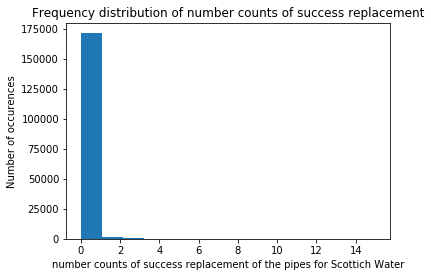

In [18]:
max_replacement_finished = replacement_finished['success_replacement_count'].max()
min_replacement_finished = replacement_finished['success_replacement_count'].min()
bins = np.linspace(min_replacement_finished, max_replacement_finished, 15)
plt.hist(replacement_finished['success_replacement_count'], bins)
plt.xlabel('number counts of success replacement of the pipes for Scottich Water')
plt.ylabel('Number of occurences')
plt.title('Frequency distribution of number counts of success replacement')
plt.subplots_adjust(left=0.15, right=0.9, bottom = 0.15, top = 0.9, wspace=0.2, hspace = 0.2)
plt.savefig(r'out/pipe_replacement.pdf')
plt.show()



In [19]:
del bins
del max_replacement_finished
del min_replacement_finished
del pipe_replacement
del postcode
del replacement_count
del valid_cols



In [20]:
replacement_finished.head(20)


,any_replacement,success_replacement_count
Street postcode,,
AB101AA,False,0.0
AB101AB,False,0.0
AB101AF,False,0.0
AB101AG,False,0.0
AB101AH,False,0.0
AB101AJ,False,0.0
AB101AL,False,0.0
AB101AN,False,0.0
AB101AQ,False,0.0


In [21]:
property_age_data = pd.read_csv("raw-data/Other - SAA_PropertyAgeData.csv", engine="c", encoding="Latin-1")
property_age_data['Postcode'] = property_age_data['Postcode'].str.replace(' ', '')
property_age_data['Postcode'] = property_age_data['Postcode'].str.upper()
property_age_data.head(20)


,UPRN,Postcode,Building_Type,Age_Year,Age_Category,XCOORD,YCOORD
0,116000269.0,TD13SG,Detached,2002.0,NaN,351620.0,634825.0
1,116000270.0,TD13SG,Detached,2003.0,NaN,351612.0,634831.0
2,116000271.0,TD13SG,Detached,2003.0,NaN,351599.0,634836.0
3,116000272.0,TD13SG,Detached,2002.0,NaN,351588.0,634843.0
4,116000273.0,TD13SG,Detached,2003.0,NaN,351582.0,634851.0
5,116000274.0,TD13SG,Detached,2003.0,NaN,351575.0,634860.0
6,116000276.0,TD13SG,Detached,2003.0,NaN,351569.0,634869.0
7,116000277.0,TD13SG,Detached,2002.0,NaN,351561.0,634878.0
8,116000278.0,TD13SG,Detached,2003.0,NaN,351559.0,634891.0
9,116000280.0,TD13SG,Detached,2003.0,NaN,351537.0,634889.0


In [22]:
property_age_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211781 entries, 0 to 2211780
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   UPRN           float64
 1   Postcode       object 
 2   Building_Type  object 
 3   Age_Year       float64
 4   Age_Category   object 
 5   XCOORD         float64
 6   YCOORD         float64
dtypes: float64(4), object(3)
memory usage: 118.1+ MB


In [23]:
property_age_data.describe()


,UPRN,Age_Year,XCOORD,YCOORD
count,2.088566e+06,854192.000000,2.211781e+06,2.211781e+06
mean,1.090859e+11,1961.599247,2.957106e+05,6.916934e+05
std,2.865537e+11,39.963130,4.909975e+04,6.901412e+04
min,1.160003e+08,1006.000000,9.382400e+04,5.318970e+05
25%,1.260406e+08,1936.000000,2.573200e+05,6.616060e+05
50%,1.511097e+08,1968.000000,2.888950e+05,6.721280e+05
75%,9.063436e+08,1995.000000,3.275310e+05,6.978190e+05
max,9.067006e+11,2013.000000,4.689780e+05,1.216407e+06


In [24]:
property_age_data['Age_Category'].value_counts()
# we nned to find the year post 1970
# Post 1971 is the only one meets the screening criteria


AgeCat: Post 1945                                          205489
AgeCat: post 1960                                          185603
AgeCat: 1945 -1962                                         168783
AgeCat: 1945 onwards                                        95930
AgeCat: Post 1960                                           68118
AgeCat: 1929-1939                                           59038
AgeCat: 1945 to 1959                                        58727
AgeCat: 1890 and before                                     54312
AgeCat: Post 1950 For Private Post 1960 Local Authority     51288
AgeCat: 1890 - 1914                                         47190
AgeCat: 1945 to 1953                                        45984
AgeCat: Inter War                                           45026
AgeCat: 1870 - 1900                                         36344
AgeCat: 1870 to 1900                                        32693
AgeCat: Pre 1880                                            29027
AgeCat: 19

In [25]:
property_age_data['Age_Category'] = property_age_data['Age_Category'].astype('str')
property_age_data['>=1970'] = (property_age_data['Age_Category'] =='AgeCat: Post 1971') | (property_age_data['Age_Year'] >= 1970)
property_age_data.head(20)

,UPRN,Postcode,Building_Type,Age_Year,Age_Category,XCOORD,YCOORD,>=1970
0,116000269.0,TD13SG,Detached,2002.0,nan,351620.0,634825.0,True
1,116000270.0,TD13SG,Detached,2003.0,nan,351612.0,634831.0,True
2,116000271.0,TD13SG,Detached,2003.0,nan,351599.0,634836.0,True
3,116000272.0,TD13SG,Detached,2002.0,nan,351588.0,634843.0,True
4,116000273.0,TD13SG,Detached,2003.0,nan,351582.0,634851.0,True
5,116000274.0,TD13SG,Detached,2003.0,nan,351575.0,634860.0,True
6,116000276.0,TD13SG,Detached,2003.0,nan,351569.0,634869.0,True
7,116000277.0,TD13SG,Detached,2002.0,nan,351561.0,634878.0,True
8,116000278.0,TD13SG,Detached,2003.0,nan,351559.0,634891.0,True
9,116000280.0,TD13SG,Detached,2003.0,nan,351537.0,634889.0,True


In [26]:
ratio_of_after_1970 = property_age_data[['>=1970', 'Postcode']].groupby('Postcode').mean()
ratio_of_after_1970

,>=1970
Postcode,
AB101AU,0.142857
AB101BA,0.217391
AB101BB,0.000000
AB101BD,0.000000
AB101FG,0.041667
...,...
ZE39JU,0.000000
ZE39JW,0.368421
ZE39JX,1.000000


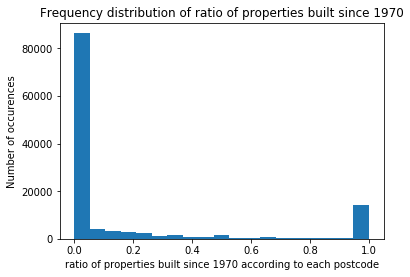

In [27]:
max_ratio_of_after_1970 = ratio_of_after_1970['>=1970'].max()
min_ratio_of_after_1970 = ratio_of_after_1970['>=1970'].min()
bins = np.linspace(min_ratio_of_after_1970, max_ratio_of_after_1970, 20)
plt.hist(ratio_of_after_1970['>=1970'], bins)
plt.xlabel('ratio of properties built since 1970 according to each postcode')
plt.ylabel('Number of occurences')
plt.title('Frequency distribution of ratio of properties built since 1970')
plt.subplots_adjust(left=0.15, right=0.9, bottom = 0.15, top = 0.9, wspace=0.2, hspace = 0.2)
plt.savefig(r'out/property_age_clean.pdf')
plt.show()




In [28]:
del bins
del max_ratio_of_after_1970
del min_ratio_of_after_1970
del property_age_data


In [29]:
ratio_of_after_1970.head(20)


,>=1970
Postcode,
AB101AU,0.142857
AB101BA,0.217391
AB101BB,0.000000
AB101BD,0.000000
AB101FG,0.041667
AB101FL,0.000000
AB101HF,0.000000
AB101HP,0.166667
AB101JD,0.000000


In [30]:

###############################################################
# import packages and data
###############################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# load raw-data/SW - Scottish Water Zonal Phosphate Levels.xls
phosphate_level_N = pd.read_excel("raw-data/SW - Scottish Water Zonal Phosphate Levels.xls",
                                  sheet_name="North", header=None, skiprows=[0, 1, 2, 3, 4])
phosphate_level_S = pd.read_excel("raw-data/SW - Scottish Water Zonal Phosphate Levels.xls",
                                  sheet_name="South", header=None, skiprows=[0, 1, 2, 3, 4])
phosphate_level_E = pd.read_excel("raw-data/SW - Scottish Water Zonal Phosphate Levels.xls",
                                  sheet_name="East", header=None, skiprows=[0, 1, 2, 3, 4])
phosphate_level_W = pd.read_excel("raw-data/SW - Scottish Water Zonal Phosphate Levels.xls",
                                  sheet_name="West", header=None, skiprows=[0, 1, 2, 3, 4])
phosphate_level = phosphate_level_N
phosphate_level = phosphate_level.append(phosphate_level_S, ignore_index=True)
phosphate_level = phosphate_level.append(phosphate_level_E, ignore_index=True)
phosphate_level = phosphate_level.append(phosphate_level_W, ignore_index=True)

del phosphate_level_N
del phosphate_level_S
del phosphate_level_E
del phosphate_level_W

phosphate_level = phosphate_level.drop(columns=[8, 9])


In [31]:

###############################################################
# convert data to a relational data
###############################################################

def remove_empty_row(df: pd.DataFrame):
    # we delete all-empty rows
    not_null: np.ndarray = (np.logical_not(df.isnull()).sum(axis=1) > 0)
    not_null_df = df.loc[not_null, :]
    return not_null_df

def to_relational(df: pd.DataFrame):
    to_drop = []
    rig_name: str = None
    new_df = df.reset_index().drop(columns="index")
    rig_names = []

    rig_count = 0

    # put address into the first column
    for row in range(df.shape[0]):
        nonempty_num = np.sum(np.logical_not((new_df.iloc[row, :]).isnull()))

        if nonempty_num == 1:

            # should remove the following rows later
            to_drop += [row, row + 1, row + 2]

            # get the name of rig
            rig_name = new_df.iloc[row, 1]
            rig_names.append(rig_name)
            rig_count += 1

        else:
            new_df.iloc[row, 0] = rig_name

    print("the total number of rigs is : {}".format(rig_count))

    return (rig_names, new_df.drop(to_drop))


# remove empty rows
phosphate_level = remove_empty_row(phosphate_level)

# save the headers here (will be removed from the table later)
header = phosphate_level.iloc[1:3, :]
new_header = ["rig_name"]

def combine(obj1, obj2):
    if str(obj1) == "nan":
        return str(obj2)
    else:
        return str(obj1) + " " + str(obj2)


for i in range(1, header.shape[1]):
    new_header += [combine(header.iloc[0, i], header.iloc[1, i])]

print("new headers: " + str(new_header))


# remove headers, and convert to relational table, add new headers
rig_names, phosphate_level = to_relational(phosphate_level)
phosphate_level.columns = new_header

# convert date
phosphate_level['Sample Date'] = pd.to_datetime(phosphate_level['Sample Date'])

# remove sample comments
phosphate_level.drop(columns="Sample Comments", inplace=True)


new headers: ['rig_name', 'Sample Date', 'Sample Number', 'Sample Comments', 'Hydrogen ion pH value', 'Lead µgPb/l', 'Phosphorus µgP/l', 'Temperature °C']
the total number of rigs is : 99


In [32]:

###############################################################
# extract related post-code
###############################################################

pattern1 = re.compile(r".*-\s*(.*?)\s*[Zz]one.*$")

pattern2 = re.compile(r".*-\s*(.*?)\s*WTW.*$")

pattern3 = re.compile(r".*-\s*(.*?)\s*(\([\w\s]*\))?$")

trailing_pattern1 = re.compile(r"(.*?)/.*$")

trailing_pattern2 = re.compile(r"(.*?)\s+[A-Z]$")

trailing_pattern3 = re.compile(r"(.*?)\s+[Bb]ute$")

trailing_pattern4 = re.compile(r"(.*?)\s*\(.*\)$")

def remove_trailing_string(s: str):
    matcher1 = re.match(trailing_pattern1, s)
    matcher2 = re.match(trailing_pattern2, s)
    matcher3 = re.match(trailing_pattern3, s)
    matcher4 = re.match(trailing_pattern4, s)

    if matcher1 is not None:
        return matcher1.group(1)

    if matcher2 is not None:
        return matcher2.group(1)

    if matcher3 is not None:
        return matcher3.group(1)

    if matcher4 is not None:
        return matcher4.group(1)

    return s

def find_zone_name(s: str):
    matcher1 = re.match(pattern1, s)
    matcher2 = re.match(pattern2, s)
    matcher3 = re.match(pattern3, s)

    if matcher1 is not None:
        return remove_trailing_string(matcher1.group(1))

    if matcher2 is not None:
        return remove_trailing_string(matcher2.group(1))

    if matcher3 is not None:
        return remove_trailing_string(matcher3.group(1))

    return None


RIG_NAME_to_WOA_mapper = dict()
for s in rig_names:
    RIG_NAME_to_WOA_mapper[s] = find_zone_name(s)


del pattern1
del pattern2
del pattern3
del trailing_pattern1
del trailing_pattern2
del trailing_pattern3
del trailing_pattern4

# get WOA names from postcode
postcode = pd.read_excel("raw-data/SW - Postcodes linked to SW Zonal Structure.xlsb", engine="pyxlsb")
valid_cols = [col for col in postcode.columns if col[0:7] != "Unnamed"]
postcode = postcode[valid_cols]
WOA_Name = postcode['WOA_Name'].unique()
WOA_Name = WOA_Name[np.logical_not(pd.isnull(WOA_Name))]
WSZ_Name = postcode['WSZ_Name'].unique()
WSZ_Name = WSZ_Name[np.logical_not(pd.isnull(WSZ_Name))]

# find matching WOA_Name
def find_match(str1: str) -> list:
    return_list = []
    for woa in WOA_Name:
        if str1.lower() in woa.lower():
            return_list += [woa]
    return return_list


WOA_mapper = dict()

for woa in set(RIG_NAME_to_WOA_mapper.values()):
    WOA_mapper[woa] = find_match(woa)


# find matching WSZ_Name
def find_match(str1: str) -> list:
    return_list = []
    for wsz in WSZ_Name:
        if str1.lower() in wsz.lower():
            return_list += [wsz]
    return return_list


WSZ_mapper = dict()

for wsz in set(RIG_NAME_to_WOA_mapper.values()):
    WSZ_mapper[wsz] = find_match(wsz)

# final mapper rig_name -> [post_codes]

def get_post_code_from_woa(rig_name: str) -> set:
    return_set: set = set()
    woas: list = WOA_mapper[RIG_NAME_to_WOA_mapper[rig_name]]
    for woa in woas:
        return_set.update(set(postcode.loc[postcode['WOA_Name'] == woa, "Trim Postcode"].to_list()))
    return return_set

def get_post_code_from_wsz(rig_name: str) -> set:
    return_set: set = set()
    wszs: list = WSZ_mapper[RIG_NAME_to_WOA_mapper[rig_name]]
    for wsz in wszs:
        return_set.update(set(postcode.loc[postcode['WSZ_Name'] == wsz, "Trim Postcode"].to_list()))
    return return_set

# REVERSE_POST_CODE_mapper maps from rig_name to post_codes

REVERSE_POST_CODE_mapper = dict()

# initialize
for rig_name in rig_names:
    REVERSE_POST_CODE_mapper[rig_name] = set()

# fill in postcodes
for rig_name in rig_names:
    this_set:set = REVERSE_POST_CODE_mapper[rig_name]
    this_set.update(get_post_code_from_woa(rig_name))
    this_set.update(get_post_code_from_wsz(rig_name))

del postcode

# number of post codes related to each rig
for key, val in REVERSE_POST_CODE_mapper.items():
    print(key + ": " + str(len(val)))




# reverse REVERSE_POST_CODE_mapper and get POST_CODE_mapper
POST_CODE_mapper = dict()
all_post_codes = set()
for v in REVERSE_POST_CODE_mapper.values():
    all_post_codes.update(v)

for p in all_post_codes:
    POST_CODE_mapper[p] = set([k for k, v in REVERSE_POST_CODE_mapper.items() if p in v]);

del RIG_NAME_to_WOA_mapper
del WOA_mapper
del WSZ_mapper
del REVERSE_POST_CODE_mapper


Lead rig - Ardrishaig Zone (Kilmartin STW): 253
Lead rig - Assynt Zone (Dingwall rig): 1451
Lead rig - Aviemore Zone (Grantown WWTP): 481
Lead rig - Backies Zone: 201
Lead rig - Campbeltown Zone (Kinloch Park PS): 228
Lead rig - Dornoch Zone (Dornoch Office/Depot ): 134
Lead rig - Fort Augustus Zone (Fort Augustus WWTP): 39
Lead rig - Fort William Zone (Office/Depot): 0
Lead rig - Glenconvinth Zone (Ruifour PS): 164
Lead rig - Inverary Zone (Furnace SR): 39
Lead rig - Inverness Zone (Kessock PS): 2420
Lead rig - Inverness Zone (Raitloan SR): 2420
Lead rig - Kinlochleven Zone (Kinlochleven WWPS): 45
Lead rig - Kyle Zone (Duirinish TWPS): 135
Lead rig - Mallaig Zone (Mallaig WWTW): 57
Lead rig - Tarbert Argyll Zone (Mealdarroch PS): 0
Lead rig - Tobermory Mull Zone (Baliscate PS): 0
Lead rig - Toftcarl Zone (Wick WWTW): 254
Lead rig - Torra Islay Zone (Port Ellen PS): 0
Lead rig - Tullich Zone (Dunbeg PS): 614
Portmahomack Lead rig - Newmore Zone (Portmahomack WWTW): 551
Lead rig - Auche

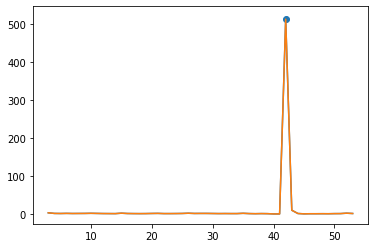

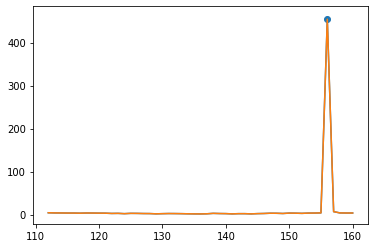

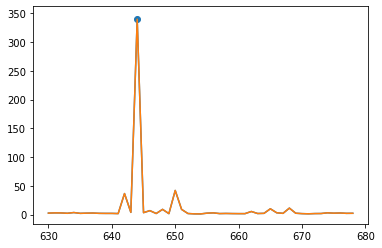

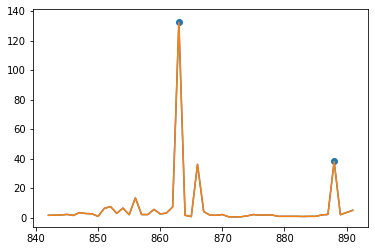

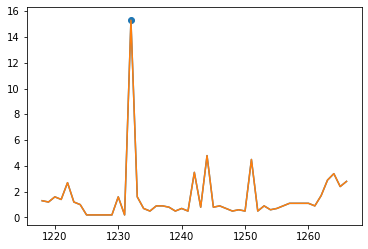

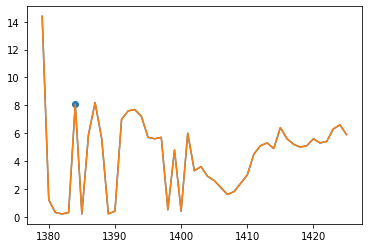

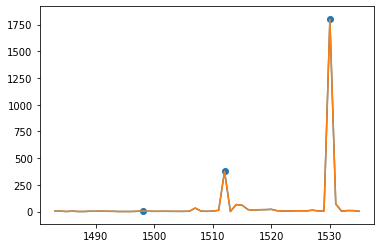

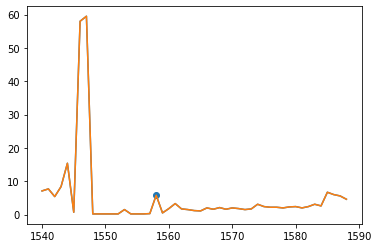

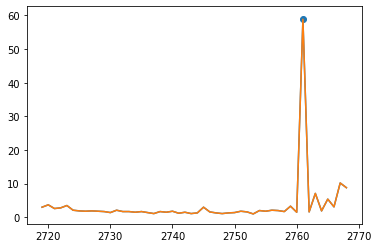

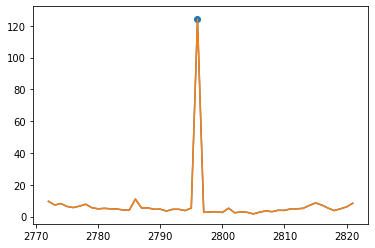

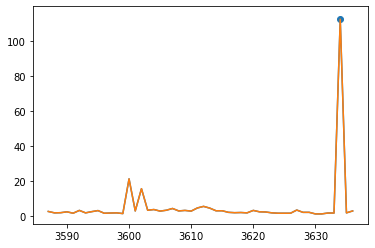

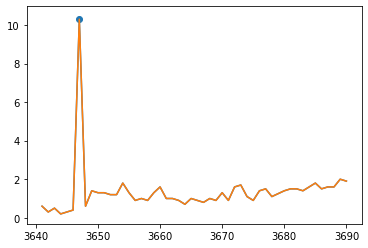

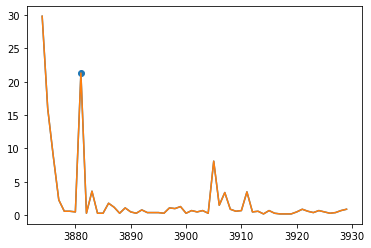

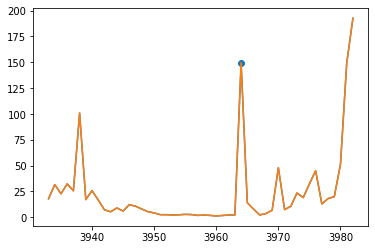

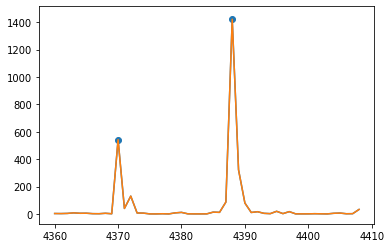

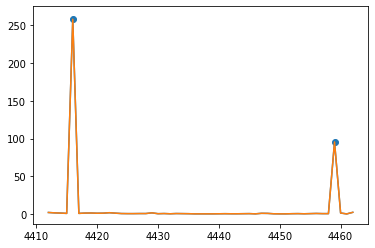

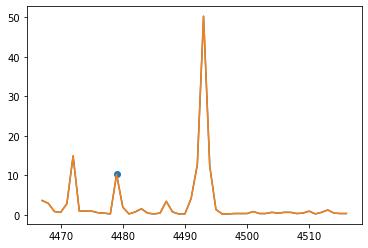

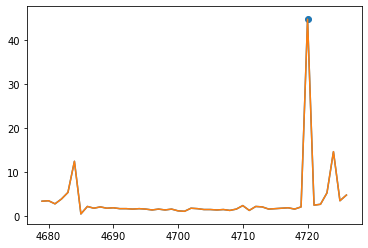

In [33]:

###############################################################
# Clean extreme values: remove values greater than 20 times
# of rolling median (window = 5)
###############################################################

# remove rows with NA
phosphate_level = phosphate_level[~np.logical_or(pd.isnull(phosphate_level["Lead µgPb/l"]),
                                                 pd.isnull(phosphate_level["Phosphorus µgP/l"]))]


# calculate moving median
phosphate_level.loc[:, 'Lead µgPb/l MVA'] = np.nan
phosphate_level.loc[:, 'Phosphorus µgP/l MVA'] = np.nan

for rig_name in rig_names:

    rolling = phosphate_level.loc[phosphate_level['rig_name'] == rig_name, 'Lead µgPb/l'].rolling(window=5).median()
    phosphate_level.loc[phosphate_level['rig_name'] == rig_name, 'Lead µgPb/l MVA'] = rolling

    rolling = phosphate_level.loc[phosphate_level['rig_name'] == rig_name, 'Phosphorus µgP/l'].rolling(window=5).median()
    phosphate_level.loc[phosphate_level['rig_name'] == rig_name, 'Phosphorus µgP/l MVA'] = rolling

# calculate ratio to moving median
median_ratio_Lead = phosphate_level.loc[:, 'Lead µgPb/l'] / phosphate_level.loc[:, 'Lead µgPb/l MVA']
median_ratio_Phosphorus = phosphate_level.loc[:, 'Phosphorus µgP/l'] / phosphate_level.loc[:, 'Phosphorus µgP/l MVA']

Lead_abnormal = median_ratio_Lead > 20
Phosphorus_abnormal = median_ratio_Phosphorus > 20

# add abnormality flag to dataframe
phosphate_level.loc[:, "Lead_abnormal"] = Lead_abnormal
phosphate_level.loc[:, "Phosphorus_abnormal"] = Phosphorus_abnormal

# visualize abnormal samples
Lead_abnormal_ads = phosphate_level.loc[Lead_abnormal, "rig_name"].unique()
Phosphorus_abnormal_ads = phosphate_level.loc[Phosphorus_abnormal, "rig_name"].unique()

def get_line(rig_name: str, col_name: str):
    return phosphate_level.loc[phosphate_level['rig_name']==rig_name, col_name]

def get_x_points(rig_name: str, col_name: str):
    if_abnormal = phosphate_level[col_name.split(' ')[0] + "_abnormal"]
    return phosphate_level.index[np.logical_and(phosphate_level['rig_name']==rig_name, if_abnormal)]

def get_y_points(rig_name: str, col_name: str):
    if_abnormal = phosphate_level[col_name.split(' ')[0] + "_abnormal"]
    return phosphate_level.loc[np.logical_and(phosphate_level['rig_name']==rig_name, if_abnormal), col_name]

for i in range(Phosphorus_abnormal_ads.shape[0]):
    fig, ax = plt.subplots(1, 1)
    ax.plot(get_line(Phosphorus_abnormal_ads[i], 'Phosphorus µgP/l'))
    ax.scatter(get_x_points(Phosphorus_abnormal_ads[i], 'Phosphorus µgP/l'),
               get_y_points(Phosphorus_abnormal_ads[i], 'Phosphorus µgP/l'))
    plt.plot(get_line(Phosphorus_abnormal_ads[i], 'Phosphorus µgP/l'))
    plt.show()
    plt.close()

for i in range(Lead_abnormal_ads.shape[0]):
    fig, ax = plt.subplots(1, 1)
    ax.plot(get_line(Lead_abnormal_ads[i], 'Lead µgPb/l'))
    ax.scatter(get_x_points(Lead_abnormal_ads[i], 'Lead µgPb/l'), get_y_points(Lead_abnormal_ads[i], 'Lead µgPb/l'))
    plt.plot(get_line(Lead_abnormal_ads[i], 'Lead µgPb/l'))
    plt.show()
    plt.close()

del Lead_abnormal_ads
del Phosphorus_abnormal_ads
del Lead_abnormal
del Phosphorus_abnormal

# remove samples: replace extreme values with NA
phosphate_level.loc[phosphate_level["Lead_abnormal"], 'Lead µgPb/l'] = np.nan
phosphate_level.loc[phosphate_level["Phosphorus_abnormal"], 'Phosphorus µgP/l'] = np.nan


In [34]:

###############################################################
# calculate recent means for each rig: keep 5 recent non-null records
###############################################################

record_number_Hydrogen = phosphate_level.loc[~phosphate_level['Hydrogen ion pH value'].isnull()]\
    .sort_values(['rig_name', 'Sample Date'], ascending=[True, False])\
    .groupby('rig_name').cumcount()
record_number_Lead = phosphate_level.loc[~phosphate_level['Lead µgPb/l'].isnull()]\
    .sort_values(['rig_name', 'Sample Date'], ascending=[True, False])\
    .groupby('rig_name').cumcount()
record_number_Phosphorus = phosphate_level.loc[~phosphate_level['Phosphorus µgP/l'].isnull()]\
    .sort_values(['rig_name', 'Sample Date'], ascending=[True, False])\
    .groupby('rig_name').cumcount()
record_number_Temperature = phosphate_level.loc[~phosphate_level['Temperature °C'].isnull()]\
    .sort_values(['rig_name', 'Sample Date'], ascending=[True, False])\
    .groupby('rig_name').cumcount()

# take 5 most recent number of records
TAKE_NUM = 5

truncated_Hydrogen = phosphate_level\
    .loc[~phosphate_level['Hydrogen ion pH value'].isnull()][['rig_name', 'Hydrogen ion pH value']]\
        .loc[record_number_Hydrogen < TAKE_NUM, :]
truncated_Lead = phosphate_level\
    .loc[~phosphate_level['Lead µgPb/l'].isnull()][['rig_name', 'Lead µgPb/l']]\
        .loc[record_number_Lead < TAKE_NUM, :]
truncated_Phosphorus = phosphate_level\
    .loc[~phosphate_level['Phosphorus µgP/l'].isnull()][['rig_name', 'Phosphorus µgP/l']]\
        .loc[record_number_Phosphorus < TAKE_NUM, :]
truncated_Temperature = phosphate_level\
    .loc[~phosphate_level['Temperature °C'].isnull()][['rig_name', 'Temperature °C']]\
        .loc[record_number_Temperature < TAKE_NUM, :]


truncated_Hydrogen['Hydrogen ion pH value'] = truncated_Hydrogen['Hydrogen ion pH value'].astype(np.float)
truncated_Lead['Lead µgPb/l'] = truncated_Lead['Lead µgPb/l'].astype(np.float)
truncated_Phosphorus['Phosphorus µgP/l'] = truncated_Phosphorus['Phosphorus µgP/l'].astype(np.float)
truncated_Temperature['Temperature °C'] = truncated_Temperature['Temperature °C'].astype(np.float)

truncated_Hydrogen = truncated_Hydrogen.groupby('rig_name').mean()
truncated_Lead = truncated_Lead.groupby('rig_name').mean()
truncated_Phosphorus = truncated_Phosphorus.groupby('rig_name').mean()
truncated_Temperature = truncated_Temperature.groupby('rig_name').mean()


In [35]:

###############################################################
# merge and construct final data at post_code level
###############################################################

rig_data: pd.DataFrame = truncated_Hydrogen
rig_data = rig_data.merge(truncated_Lead, left_index=True, right_index=True)
rig_data = rig_data.merge(truncated_Phosphorus, left_index=True, right_index=True)
rig_data = rig_data.merge(truncated_Temperature, left_index=True, right_index=True)

del phosphate_level
del record_number_Hydrogen
del record_number_Lead
del record_number_Phosphorus
del record_number_Temperature
del truncated_Hydrogen
del truncated_Lead
del truncated_Phosphorus
del truncated_Temperature

POST_CODE_RIG_DATA = {"post_code":[],
                      "pH value":[],
                      "Lead µgPb/l":[],
                      "Phosphorus µgP/l":[],
                      "Temperature °C":[]}

progress = 0

for p, v in POST_CODE_mapper.items():
    progress += 1
    data = list(rig_data.loc[np.isin(rig_data.index, list(v)), :].mean(axis=0))
    POST_CODE_RIG_DATA["post_code"].append(p)
    POST_CODE_RIG_DATA["pH value"].append(data[0])
    POST_CODE_RIG_DATA["Lead µgPb/l"].append(data[1])
    POST_CODE_RIG_DATA["Phosphorus µgP/l"].append(data[2])
    POST_CODE_RIG_DATA["Temperature °C"].append(data[3])
    if progress % 1000 == 0:
        print("progress {}/{}, {}%".format(progress, 157678, round(100 * progress / 157678, 2)))

POST_CODE_RIG_DATA = pd.DataFrame(POST_CODE_RIG_DATA)


progress 1000/157678, 0.63%
progress 2000/157678, 1.27%
progress 3000/157678, 1.9%
progress 4000/157678, 2.54%
progress 5000/157678, 3.17%
progress 6000/157678, 3.81%
progress 7000/157678, 4.44%
progress 8000/157678, 5.07%
progress 9000/157678, 5.71%
progress 10000/157678, 6.34%
progress 11000/157678, 6.98%
progress 12000/157678, 7.61%
progress 13000/157678, 8.24%
progress 14000/157678, 8.88%
progress 15000/157678, 9.51%
progress 16000/157678, 10.15%
progress 17000/157678, 10.78%
progress 18000/157678, 11.42%
progress 19000/157678, 12.05%
progress 20000/157678, 12.68%
progress 21000/157678, 13.32%
progress 22000/157678, 13.95%
progress 23000/157678, 14.59%
progress 24000/157678, 15.22%
progress 25000/157678, 15.86%
progress 26000/157678, 16.49%
progress 27000/157678, 17.12%
progress 28000/157678, 17.76%
progress 29000/157678, 18.39%
progress 30000/157678, 19.03%
progress 31000/157678, 19.66%
progress 32000/157678, 20.29%
progress 33000/157678, 20.93%
progress 34000/157678, 21.56%
progr

In [36]:
del POST_CODE_mapper
del TAKE_NUM
del WOA_Name
del WSZ_Name
del all_post_codes
del ax
del data
del fig
del header
del i
del key
del median_ratio_Lead
del median_ratio_Phosphorus
del new_header
del p
del progress
del rig_data
del rig_name
del rig_names
del rolling
del s
del this_set
del v
del val
del valid_cols
del woa
del wsz



In [37]:
UK_HPI = pd.read_csv("raw-data/Other - UK-HPI-full-file-2019-03.csv")
UK_HPI.iloc[:,0] = pd.to_datetime(UK_HPI.iloc[:,0], format = "%d/%m/%Y")
UK_HPI.head(20)

,Date,Year2,RegionName,CouncilArea2018Code,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,2004-01-01,2004,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,2004-02-01,2004,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,2004-03-01,2004,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,2004-04-01,2004,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,2004-05-01,2004,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0
5,2004-06-01,2004,Aberdeenshire,S12000034,89267.61305,44.652797,NaN,3.342974,NaN,NaN,...,94964.60319,43.239827,3.234539,NaN,164.0,89139.77924,44.967382,3.383150,NaN,361.0
6,2004-07-01,2004,Aberdeenshire,S12000034,93047.50105,46.543545,NaN,4.234333,NaN,NaN,...,98682.59954,44.932726,3.915139,NaN,163.0,93022.86929,46.926242,4.356181,NaN,489.0
7,2004-08-01,2004,Aberdeenshire,S12000034,97790.66757,48.916137,NaN,5.097575,NaN,NaN,...,103223.74280,47.000426,4.601767,NaN,130.0,97937.62146,49.405534,5.283381,NaN,382.0
8,2004-09-01,2004,Aberdeenshire,S12000034,98663.95545,49.352967,NaN,0.893018,NaN,NaN,...,103855.90760,47.288267,0.612422,NaN,142.0,98913.87933,49.898016,0.996816,NaN,355.0
9,2004-10-01,2004,Aberdeenshire,S12000034,99083.88349,49.563020,NaN,0.425614,NaN,NaN,...,104867.86010,47.749035,0.974381,NaN,164.0,99131.45382,50.007774,0.219964,NaN,426.0


In [38]:
UK_HPI = UK_HPI.iloc[:, 0:5]
UK_HPI.head(20)

,Date,Year2,RegionName,CouncilArea2018Code,AveragePrice
0,2004-01-01,2004,Aberdeenshire,S12000034,81693.66964
1,2004-02-01,2004,Aberdeenshire,S12000034,81678.76231
2,2004-03-01,2004,Aberdeenshire,S12000034,83525.09702
3,2004-04-01,2004,Aberdeenshire,S12000034,84333.67900
4,2004-05-01,2004,Aberdeenshire,S12000034,86379.95396
5,2004-06-01,2004,Aberdeenshire,S12000034,89267.61305
6,2004-07-01,2004,Aberdeenshire,S12000034,93047.50105
7,2004-08-01,2004,Aberdeenshire,S12000034,97790.66757
8,2004-09-01,2004,Aberdeenshire,S12000034,98663.95545
9,2004-10-01,2004,Aberdeenshire,S12000034,99083.88349


In [39]:
over_one_year = UK_HPI.groupby('RegionName').count()
over_one_year

,Date,Year2,CouncilArea2018Code,AveragePrice
RegionName,,,,
Aberdeenshire,183,183,183,183
Adur,291,291,291,291
Allerdale,291,291,291,291
Amber Valley,291,291,291,291
Angus,183,183,183,183
...,...,...,...,...
Wycombe,291,291,291,291
Wyre,291,291,291,291
Wyre Forest,291,291,291,291


In [40]:
# over_one_year.to_csv('over_one_year.csv',header = True)


In [41]:
latest_year = UK_HPI[['Date', 'RegionName']].groupby('RegionName').max()


In [42]:
# latest_year.to_csv('latest_year.csv',header = True)


In [43]:
UK_HPI = UK_HPI.loc[(UK_HPI['Date'] > '2018-03-01'),:]
UK_HPI.head(20)

,Date,Year2,RegionName,CouncilArea2018Code,AveragePrice
171,2018-04-01,2018,Aberdeenshire,S12000034,189034.5244
172,2018-05-01,2018,Aberdeenshire,S12000034,187975.2910
173,2018-06-01,2018,Aberdeenshire,S12000034,189593.2566
174,2018-07-01,2018,Aberdeenshire,S12000034,188102.7017
175,2018-08-01,2018,Aberdeenshire,S12000034,187745.0513
176,2018-09-01,2018,Aberdeenshire,S12000034,188525.5974
177,2018-10-01,2018,Aberdeenshire,S12000034,190634.9922
178,2018-11-01,2018,Aberdeenshire,S12000034,189724.3799
179,2018-12-01,2018,Aberdeenshire,S12000034,185103.4285
180,2019-01-01,2019,Aberdeenshire,S12000034,182496.4283


In [44]:
average_price = UK_HPI.groupby('CouncilArea2018Code').mean()
average_price.reset_index(inplace = True)
average_price.head(20)


,CouncilArea2018Code,Year2,AveragePrice
0,E06000001,2018.25,107994.296942
1,E06000002,2018.25,110281.322492
2,E06000003,2018.25,119177.718700
3,E06000004,2018.25,135868.715367
4,E06000005,2018.25,130887.703017
5,E06000006,2018.25,138311.010900
6,E06000007,2018.25,190820.058083
7,E06000008,2018.25,112084.515750
8,E06000009,2018.25,104466.756525
9,E06000010,2018.25,111883.000050


In [45]:
# to connect the street postecode from it with CouncilArea2018Code here.
household_count = pd.read_csv("raw-data/Other - Postcode_ household count_ urban class.csv")
household_count['Street postcode'] = household_count['Street postcode'].str.replace(' ', '')
household_count['Street postcode'] = household_count['Street postcode'].str.upper()
household_count.head(20)


,Street postcode,District postcode,Sector postcode,DateOfIntroduction,DateOfDeletion,YearOfDeletion,GridReferenceEasting,GridReferenceNorthing,Latitude,Longitude,...,RegistrationDistrict2007Code,ROACommunityPlanningPartnership2006Code,ROALocal2006Code,StrategicDevelopmentPlanningArea2013Code,TravelToWorkArea2011Code,UrbanRural6Fold2016Code,UrbanRural8Fold2016Code,GridLinkIndicator,GridLinkPositionalAccuracy,NeverDigitised
0,AB452NL,AB45,AB45 2,01/08/1990 00:00,ND,ND,365169,865455,57.677605,-2.585697,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
1,AB452NN,AB45,AB45 2,01/08/1990 00:00,ND,ND,365369,865449,57.677567,-2.582343,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
2,AB452NP,AB45,AB45 2,01/08/1990 00:00,ND,ND,365475,865493,57.677970,-2.580572,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
3,AB452NW,AB45,AB45 2,12/07/1996 00:00,ND,ND,365743,865547,57.678476,-2.576086,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
4,AB452PJ,AB45,AB45 2,01/08/1990 00:00,ND,ND,358760,866116,57.682999,-2.693262,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
5,AB452PL,AB45,AB45 2,01/08/1990 00:00,ND,ND,358741,866035,57.682270,-2.693566,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
6,AB452PN,AB45,AB45 2,01/08/1990 00:00,ND,ND,358668,866203,57.683772,-2.694819,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
7,AB452PP,AB45,AB45 2,01/08/1990 00:00,ND,ND,358540,866149,57.683275,-2.696956,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
8,AB452PX,AB45,AB45 2,01/08/1990 00:00,ND,ND,358637,865952,57.681515,-2.695296,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
9,AB452UX,AB45,AB45 2,01/08/1990 00:00,ND,ND,355350,861112,57.637729,-2.749513,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN


In [46]:
property_price = pd.merge(household_count, average_price, left_on = 'CouncilArea2018Code', right_on = 'CouncilArea2018Code', how = 'left')
property_price = property_price[['Street postcode', 'AveragePrice']]
property_price = property_price[['AveragePrice', 'Street postcode']].groupby('Street postcode').mean()
property_price.columns=['Average House Price for Street Postcode']
property_price


,Average House Price for Street Postcode
Street postcode,
AB101AJ,156016.128900
AB101AL,156016.128900
AB101AN,156016.128900
AB101AP,156016.128900
AB101AS,156016.128900
...,...
ZE39JU,162171.729717
ZE39JW,162171.729717
ZE39JX,162171.729717


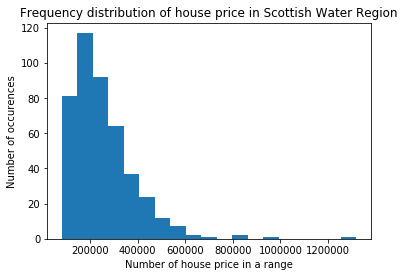

In [47]:
mean_price_of_all = average_price['AveragePrice'].mean()
#  254893.38524889827
std_of_all = average_price['AveragePrice'].std()
# 134495.95605388767
max_price_of_all = average_price['AveragePrice'].max()
# 1320226.3068333336
min_price_of_all = average_price['AveragePrice'].min()
# 81449.31328916666
median_price_of_all = average_price['AveragePrice'].median()
# 224883.2931166667
bins = np.linspace(min_price_of_all, max_price_of_all, 20)
plt.hist(average_price['AveragePrice'], bins)
plt.xlabel('Number of house price in a range')
plt.ylabel('Number of occurences')
plt.title('Frequency distribution of house price in Scottish Water Region')
plt.subplots_adjust(left=0.15, right=0.9, bottom = 0.15, top = 0.9, wspace=0.2, hspace = 0.2)
plt.savefig(r'out/UK_HPI_clean.pdf')
plt.show()

In [48]:
del UK_HPI
del average_price
del bins
del household_count
del latest_year
del max_price_of_all
del min_price_of_all
del mean_price_of_all
del median_price_of_all
del over_one_year
del std_of_all



In [49]:
property_price.head(20)


,Average House Price for Street Postcode
Street postcode,
AB101AJ,156016.1289
AB101AL,156016.1289
AB101AN,156016.1289
AB101AP,156016.1289
AB101AS,156016.1289
AB101AU,156016.1289
AB101AW,156016.1289
AB101BA,156016.1289
AB101BB,156016.1289


In [50]:
lead_sample = pd.read_excel("raw-data/SW - All Lead WQ Samples (2010-18).xls")
valid_cols = [col for col in lead_sample.columns if col[0:7] != "Unnamed"]
lead_sample = lead_sample[valid_cols]


In [51]:
lead_sample['Street Postcode'] = lead_sample['Street Postcode'].str.replace(' ', '')
lead_sample['Street Postcode'] = lead_sample['Street Postcode'].str.upper()

print(lead_sample['Result Status Description'].value_counts())


Authorised     64272
Cancelled       1241
Not entered       18
Entered            1
Name: Result Status Description, dtype: int64


In [52]:
lead_sample['Sample Date'] = pd.to_datetime(lead_sample['Sample Date'])
latest_sample_date = lead_sample[['Street Postcode', 'Sample Date']].groupby('Street Postcode').max()
latest_sample_date['Sample Date'] = latest_sample_date['Sample Date'] - pd.DateOffset(years=1)
latest_sample_date.columns = ['Sample Date Offset']
lead_sample = lead_sample.merge(latest_sample_date, left_on='Street Postcode', right_index=True)
lead_sample = lead_sample[lead_sample['Sample Date'] >= lead_sample['Sample Date Offset']]


In [53]:
lead_sample = lead_sample[lead_sample['Result Status Description'] == "Authorised"]



In [54]:

# most streets have only one lead sample

(lead_sample['Street Postcode'].value_counts() == 1).value_counts()


True     16069
False     5177
Name: Street Postcode, dtype: int64

In [55]:
all_lead_sample = lead_sample[['Street Postcode', 'Result Numeric Entry']].groupby('Street Postcode').mean()


In [56]:
del lead_sample
del latest_sample_date
del valid_cols


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [58]:
comm_pipe = pd.read_excel("raw-data/SW - Comm pipe data.xls", dtype={"AR10_PROPERTYID":str})
valid_cols = [col for col in comm_pipe.columns if col[0:7] != "Unnamed"]
comm_pipe = comm_pipe[valid_cols]

needed_columns = ['AR10_MATERIAL',
                  'Street postcode',
                  'MAIN_DISTANCE',
                  'AGE',
                  'How certain is  the identification?',
                  'Is there any evidence of leakage?',
                  'Is the property age pre 1970?',
                  'Pipe Material ',
                  'Estimated length of pipe in meters']

comm_pipe = comm_pipe[needed_columns]
comm_pipe.columns = ['ar10_Material',
                     'Street postcode',
                     'main distance',
                     'commission year',
                     'identification confidence',
                     'leakage',
                     'property pre 1970',
                     'pipe material',
                     'estimated length of pipe']

comm_pipe['identification confidence'] = comm_pipe['identification confidence'].str.replace(' ', '')
del valid_cols
del needed_columns



In [59]:
print(comm_pipe['ar10_Material'].value_counts())
print(comm_pipe['identification confidence'].value_counts())
print(comm_pipe['leakage'].value_counts())
print(comm_pipe['property pre 1970'].value_counts())
print(comm_pipe['pipe material'].value_counts())



LEAD      9800
COPPER    1251
MDPE      1184
GI         257
Lead        29
Copper      22
Name: ar10_Material, dtype: int64
96-100%    6402
76-95%     4229
51-75%      715
95-100%     474
75-95%      338
50-75%       81
0-50%        24
50-67%        2
Name: identification confidence, dtype: int64
No     12119
Yes      122
Name: leakage, dtype: int64
Yes    10956
No      1308
yes        1
Name: property pre 1970, dtype: int64
Copper             6180
Poly               5287
Lead                866
LEAD                 28
copper               18
PVC                  15
Other                14
cast iron             8
POLY                  7
Other (Specify)       5
lead                  1
asbestos              1
CI                    1
Name: pipe material, dtype: int64


In [60]:

# identification confidence to numeric

# 96-100%    6402
# 76-95%     4229
# 51-75%      715
# 95-100%     474
# 75-95%      338
# 50-75%       81
# 0-50%        24
# 50-67%        2

confidence_pattern = re.compile(r'^\d{1,2}-(\d{2,3})%$')

def confidence_to_numeric(s: str) -> int:
    return int(confidence_pattern.match(s).group(1))

comm_pipe['identification confidence'] = [confidence_to_numeric(s) if not pd.isnull(s) else np.nan for s in comm_pipe['identification confidence']]

del confidence_pattern

# is_pipe_lead

# Copper             6180
# Poly               5287
# Lead                866
# LEAD                 28
# copper               18
# PVC                  15
# Other                14
# cast iron             8
# POLY                  7
# Other (Specify)       5
# CI                    1
# asbestos              1
# lead                  1
# Name: pipe material, dtype: int64

comm_pipe['is_pipe_lead'] = np.isin(comm_pipe['pipe material'], ['LEAD', 'Lead', 'lead'])

# ar10_is_pipe_lead

# LEAD      9800
# COPPER    1251
# MDPE      1184
# GI         257
# Lead        29
# Copper      22
comm_pipe['ar10_is_pipe_lead'] = np.isin(comm_pipe['ar10_Material'], ['LEAD', 'Lead', 'lead'])

comm_pipe['leakage'] = np.isin(comm_pipe['leakage'], ['Yes'])

comm_pipe['property pre 1970'] = np.isin(comm_pipe['property pre 1970'], ['Yes', 'yes'])

comm_pipe.drop(columns=['pipe material', 'ar10_Material'])


,Street postcode,main distance,commission year,identification confidence,leakage,property pre 1970,estimated length of pipe,is_pipe_lead,ar10_is_pipe_lead
0,G605JA,9.934,1960.0,100.0,False,False,1,False,False
1,G605LT,17.914,1955.0,100.0,False,True,1,False,True
2,G814JN,12.712,1955.0,100.0,False,True,1,False,True
3,G814JN,25.427,1955.0,100.0,False,True,1,False,True
4,G814JS,18.539,1960.0,100.0,False,True,9,False,False
...,...,...,...,...,...,...,...,...,...
12538,IV499BA,40.245,1961.0,95.0,False,True,1 - 5,False,True
12539,IV499BA,5.548,1961.0,95.0,False,False,1 - 5,False,True
12540,IV499BA,68.113,1961.0,100.0,False,True,1 - 5,False,False
12541,IV499BA,8.110,1961.0,100.0,False,True,1 - 5,False,False


In [61]:
comm_pipe = comm_pipe.groupby('Street postcode').mean()



In [62]:
postcode = pd.read_excel("raw-data/SW - Postcodes linked to SW Zonal Structure.xlsb", engine="pyxlsb")
POST_CODE_RIG_DATA.set_index('post_code', inplace = True)



In [63]:
output = postcode[['Trim Postcode']]
output.columns = ["post_code"]


In [64]:

output = output.merge(POST_CODE_RIG_DATA, left_on='post_code', right_index=True, how='left')
output = output.merge(all_lead_sample, left_on='post_code', right_index=True, how='left')
output = output.merge(comm_pipe, left_on='post_code', right_index=True, how='left')
output = output.merge(property_price, left_on='post_code', right_index=True, how='left')
output = output.merge(ratio_of_after_1970, left_on='post_code', right_index=True, how='left')
output = output.merge(replacement_finished, left_on='post_code', right_index=True, how='left')


In [65]:
output.columns = ['post_code',
                  'rig - PH value',
                  'rig - Lead µgPb/l',
                  'rig - Phosphorus µgP/l',
                  'rig - Temperature °C',
                  'sample - lead µgPb/l',
                  'comm pipe - main distance',
                  'comm pipe - commission year',
                  'comm pipe - identification confidence',
                  'comm pipe - leakage',
                  'comm pipe - property pre 1970',
                  'comm pipe - lead pipe ratio',
                  'comm pipe - ar10 lead pipe ratio',
                  'HPI - Average House Price',
                  'HPI - Estimated post 1970 ratio',
                  'replacement - any_replacement',
                  'replacement - success_replacement_count']

In [66]:
output.to_csv('processed-data/processed_data.csv', float_format="%.5f", index=False)

